In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
np.random.seed(40)

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Saving Plots**

In [ ]:
root_dir = "/content"
plots_path = os.path.join(root_dir, "plots")
os.makedirs(plots_path, exist_ok=True)

def save_plots(fig_name, tight_layout=True, fig_extension="png", resolution=300):
  image_path = os.path.join(plots_path, "{}.{}".format(fig_name, fig_extension))
  print("Plot is saved at {}".format(image_path))
  if tight_layout:
    plt.tight_layout()
  plt.savefig(image_path, format=fig_extension, dpi=resolution)

# **Reading and Visualization of Dataset**

In [ ]:
dataframe = pd.read_csv("/content/drive/My Drive/Bands/2020_41_features_new.csv")
dataframe = dataframe.drop("Unnamed: 0", 1)
dataframe["class"] = dataframe["class"].map({1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6})

dataframe.head()

,baei_2020,contrast_2020_b4,contrast_2020_b7,contrast_2020_b9,entropy_2020_b4,entropy_2020_b7,entropy_2020_b9,gndvi_2020,homogeneit_2020_b10,homogeneit_2020_b4,homogeneit_2020_b7,homogeneit_2020_b9,mean_2020_b10,mean_2020_b4,mean_2020_b7,mean_2020_b9,mndwi_2020,msavi_2020,ndvi_2020,ndwi_2020,ndwi2_2020,nrvi_2020,savi_2020,second_moment_2020_b10,second_moment_2020_b4,second_moment_2020_b7,second_moment_2020_b9,sr_2020,ssss.1,ssss.2,ssss.3,ssss.4,ssss.5,ssss.6,ssss.7,ssss.8,ssss.9,ssss.10,variance_2020_b4,variance_2020_b7,variance_2020_b9,class
0,0.338585,0.333333,0.333333,0.666667,0.636514,1.098612,1.273028,0.096709,1.000000,0.833333,0.833333,0.666667,0.125000,0.119792,0.109375,0.201389,-0.478515,-1.137382,-0.033467,-0.096709,-0.400332,0.033467,-0.050190,1.000000,0.555556,0.333333,0.308642,0.935233,903,892,1158,1083,1168,1255,1317,1479,2529,1782,15.056017,12.876546,40.622349,0
1,0.355256,0.333333,0.000000,2.777778,0.636514,0.000000,1.522955,0.143484,0.666667,0.833333,1.000000,0.544444,0.125000,0.119792,0.125000,0.227431,-0.507941,-1.161738,-0.039086,-0.143484,-0.393107,0.039086,-0.058618,0.333333,0.555556,1.000000,0.234568,0.924769,966,976,1409,1303,1403,1615,1621,1954,2991,2112,15.056017,15.015625,57.180584,0
2,0.371050,0.222222,0.222222,0.333333,0.529706,0.995027,1.273028,0.147619,0.777778,0.888889,0.888889,0.833333,0.142361,0.152778,0.135417,0.262153,-0.495656,-1.184444,-0.044283,-0.147619,-0.375513,0.044283,-0.066413,0.358025,0.654321,0.407407,0.308642,0.915190,1089,1074,1580,1446,1577,1777,1774,2144,3185,2162,21.563465,18.814634,65.366180,0
3,0.277256,0.111111,0.333333,0.333333,0.348832,0.636514,1.273028,0.106707,0.833333,0.944444,0.833333,0.833333,0.137153,0.123264,0.098958,0.237847,-0.560610,-1.035763,-0.009099,-0.106707,-0.482783,0.009099,-0.013646,0.308642,0.802469,0.555556,0.308642,0.981966,942,879,1109,1089,1057,1178,1098,1404,3122,2282,14.278697,8.416042,55.409580,0
4,0.371037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118457,1.000000,1.000000,1.000000,1.000000,0.125000,0.125000,0.125000,0.218750,-0.468880,-1.200885,-0.048066,-0.118457,-0.371030,0.048066,-0.072084,1.000000,1.000000,1.000000,1.000000,0.908277,1009,960,1341,1218,1420,1642,1523,1825,2655,1798,15.015625,15.015625,45.985352,0


In [ ]:
dataframe.shape

(4993, 42)

In [ ]:
sample_incomplete_rows = dataframe[dataframe.isnull().any(axis=1)].head()
sample_incomplete_rows

,baei_2020,contrast_2020_b4,contrast_2020_b7,contrast_2020_b9,entropy_2020_b4,entropy_2020_b7,entropy_2020_b9,gndvi_2020,homogeneit_2020_b10,homogeneit_2020_b4,homogeneit_2020_b7,homogeneit_2020_b9,mean_2020_b10,mean_2020_b4,mean_2020_b7,mean_2020_b9,mndwi_2020,msavi_2020,ndvi_2020,ndwi_2020,ndwi2_2020,nrvi_2020,savi_2020,second_moment_2020_b10,second_moment_2020_b4,second_moment_2020_b7,second_moment_2020_b9,sr_2020,ssss.1,ssss.2,ssss.3,ssss.4,ssss.5,ssss.6,ssss.7,ssss.8,ssss.9,ssss.10,variance_2020_b4,variance_2020_b7,variance_2020_b9,class


There are no null values

In [ ]:
header_colums = list(dataframe)
# header_colums

In [ ]:
# dataframe.dtypes

In [ ]:
dataframe["class"].value_counts()

3    1941
4    1105
0     750
2     316
6     306
5     300
1     275
Name: class, dtype: int64

Plot is saved at /content/plots/Attribute_histogram_plots.png


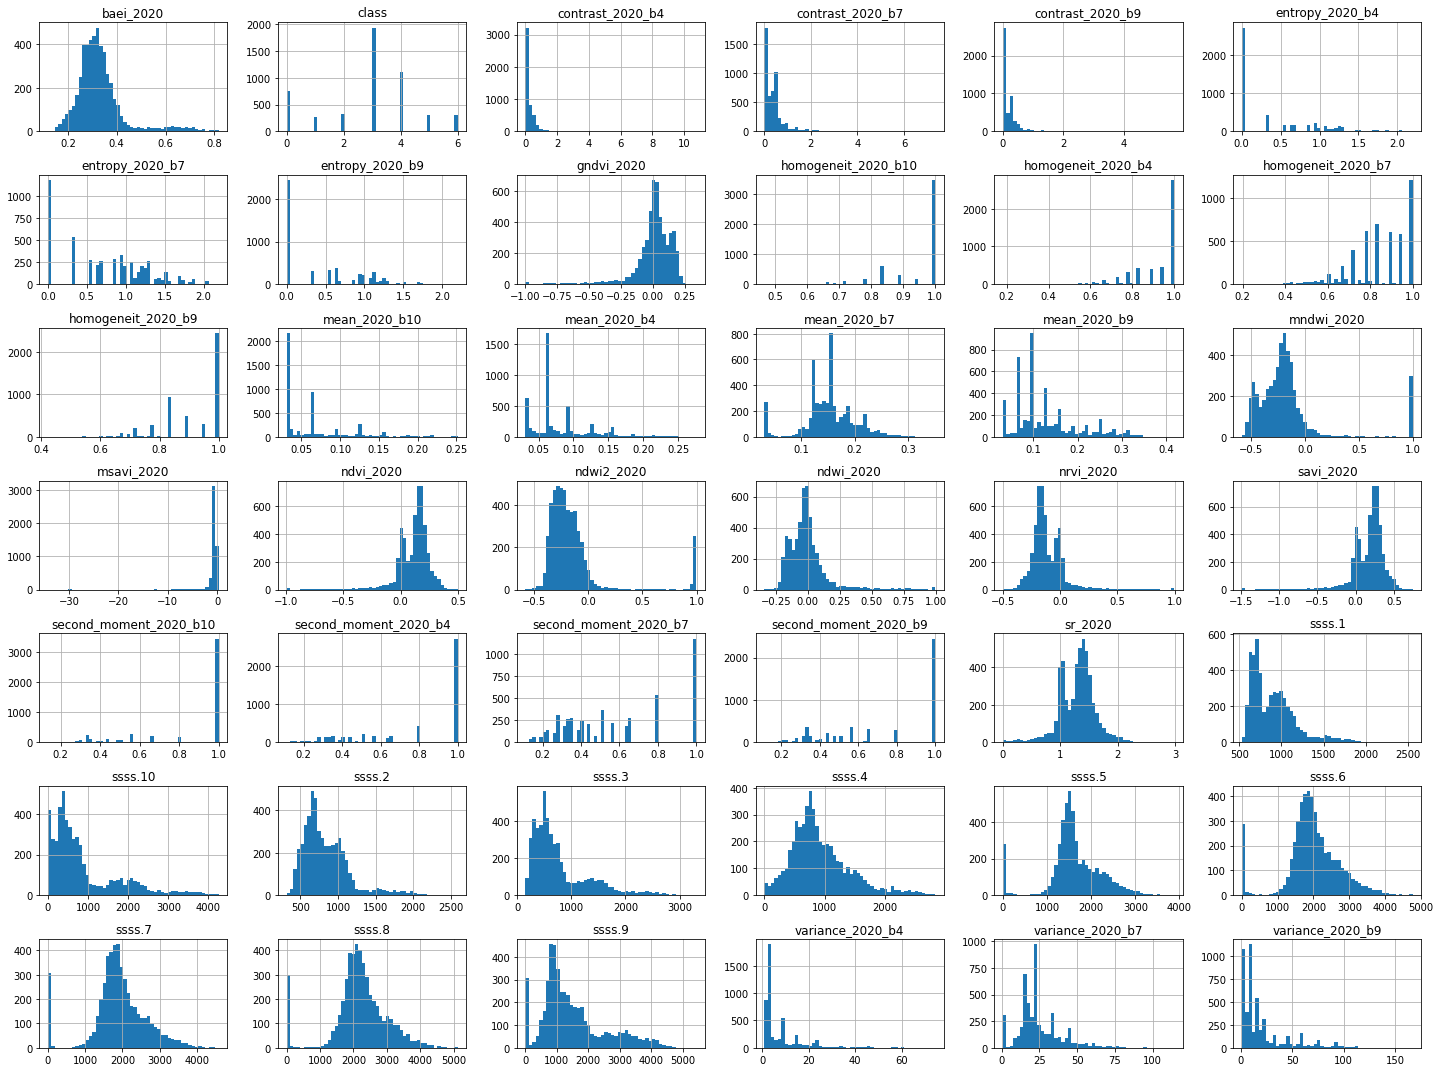

In [ ]:
dataframe.hist(bins=50, figsize=(20,15))
save_plots("Attribute_histogram_plots")
plt.show()

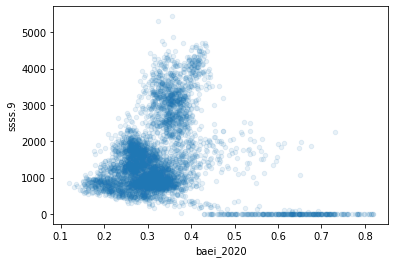

In [ ]:
dataframe.plot(kind="scatter", x="baei_2020", y="ssss.9", alpha=0.1)

Plot is saved at /content/plots/Clusters_baei_2020_vs_ssss8.png


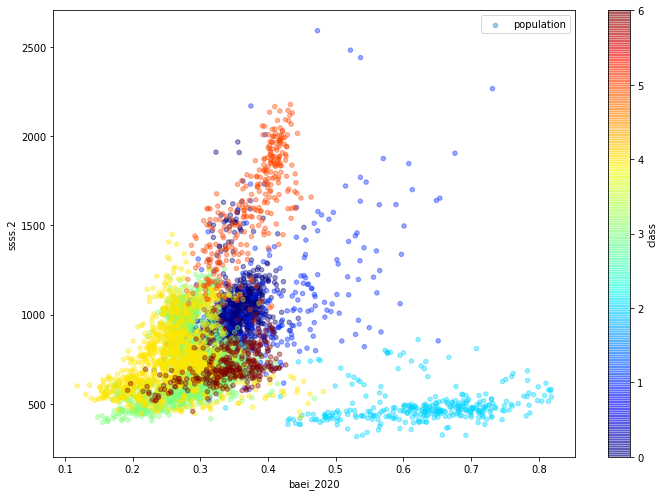

In [ ]:
dataframe.plot(kind="scatter", x="baei_2020", y="ssss.2", alpha=0.4, label="population", figsize=(10,7),
    c="class", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

save_plots("Clusters_baei_2020_vs_ssss8")
plt.show()

In [ ]:
corr_matrix = dataframe.corr()
# corr_matrix["class"].sort_values(ascending=False)

Plot is saved at /content/plots/scatter_matrix_plot.png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  if __name__ == '__main__':


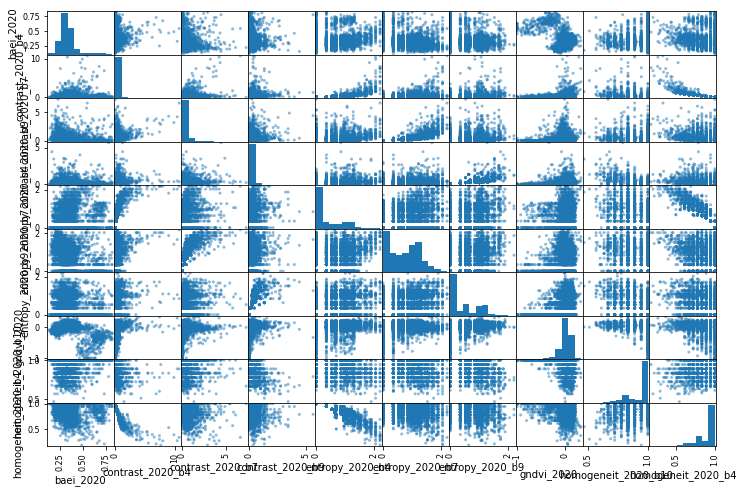

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataframe[header_colums[:10]], figsize=(12, 8))
save_plots("scatter_matrix_plot")

In [ ]:
dataframe.describe()

,baei_2020,contrast_2020_b4,contrast_2020_b7,contrast_2020_b9,entropy_2020_b4,entropy_2020_b7,entropy_2020_b9,gndvi_2020,homogeneit_2020_b10,homogeneit_2020_b4,homogeneit_2020_b7,homogeneit_2020_b9,mean_2020_b10,mean_2020_b4,mean_2020_b7,mean_2020_b9,mndwi_2020,msavi_2020,ndvi_2020,ndwi_2020,ndwi2_2020,nrvi_2020,savi_2020,second_moment_2020_b10,second_moment_2020_b4,second_moment_2020_b7,second_moment_2020_b9,sr_2020,ssss.1,ssss.2,ssss.3,ssss.4,ssss.5,ssss.6,ssss.7,ssss.8,ssss.9,ssss.10,variance_2020_b4,variance_2020_b7,variance_2020_b9,class
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,0.330421,0.233393,0.417117,0.216703,0.413023,0.741790,0.448315,0.006290,0.946903,0.912529,0.839100,0.908569,0.066357,0.083216,0.153203,0.128258,-0.165086,-0.781112,0.109055,-0.006290,-0.139258,-0.109055,0.163538,0.845047,0.768451,0.587749,0.737761,1.296152,899.181654,835.646705,768.223313,924.215101,1616.830563,1986.506709,1917.056679,2205.718205,1502.812738,877.192069,8.719690,25.159849,21.086165,2.901262
std,0.101020,0.586200,0.584879,0.349684,0.536612,0.549080,0.505684,0.159551,0.090673,0.128386,0.142205,0.108557,0.046871,0.045096,0.048519,0.073389,0.333863,1.843313,0.152422,0.159551,0.303523,0.152422,0.228396,0.249985,0.286873,0.283094,0.284135,0.318066,268.974475,308.318131,517.589511,484.623903,606.984352,759.047909,742.836137,823.196394,1020.083514,856.994960,10.373882,14.750647,24.410582,1.624650
min,0.117813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.996727,0.466667,0.182051,0.195425,0.422222,0.031250,0.031250,0.031250,0.031250,-0.585417,-34.280582,-0.993769,-0.340878,-0.578292,-0.497059,-1.488336,0.135802,0.111111,0.111111,0.111111,0.003125,530.000000,316.000000,155.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.918403,0.901840,0.888699,0.000000
25%,0.272682,0.000000,0.111111,0.000000,0.000000,0.348832,0.000000,-0.032616,0.888889,0.833333,0.777778,0.833333,0.031250,0.062500,0.126736,0.076389,-0.340105,-0.870090,0.033342,-0.095770,-0.295846,-0.191731,0.050006,0.654321,0.506173,0.333333,0.481481,1.068984,695.000000,626.000000,422.000000,601.000000,1369.000000,1652.000000,1602.000000,1871.000000,828.000000,317.000000,3.753906,15.233037,5.347415,2.000000
50%,0.314397,0.000000,0.333333,0.111111,0.000000,0.848686,0.348832,0.024645,1.000000,1.000000,0.833333,0.944444,0.050347,0.062500,0.154514,0.100694,-0.214714,-0.496375,0.143898,-0.024645,-0.214179,-0.143898,0.215749,1.000000,1.000000,0.506173,0.802469,1.336170,842.000000,760.000000,590.000000,821.000000,1556.000000,1945.000000,1877.000000,2186.000000,1213.000000,569.000000,3.753906,23.445099,9.927617,3.000000
75%,0.356994,0.333333,0.555556,0.333333,0.848686,1.214890,0.936888,0.095770,1.000000,1.000000,0.944444,1.000000,0.078125,0.095486,0.182292,0.156250,-0.126485,-0.356150,0.191731,0.032616,-0.111892,-0.033342,0.287523,1.000000,1.000000,0.802469,1.000000,1.474425,1035.000000,990.000000,921.000000,1160.000000,1941.000000,2393.000000,2301.000000,2627.000000,1915.000000,1139.000000,8.476589,32.604599,23.461914,4.000000
max,0.818738,10.777778,7.333333,5.666667,2.197225,2.197225,2.197225,0.340878,1.000000,1.000000,1.000000,1.000000,0.251736,0.276042,0.350694,0.418403,0.997677,0.327878,0.497059,0.996727,0.997379,0.993769,0.745040,1.000000,1.000000,1.000000,1.000000,2.976608,2557.000000,2592.000000,3309.000000,2829.000000,3875.000000,4770.000000,4588.000000,5122.000000,5440.000000,4260.000000,74.309814,114.074379,167.017654,6.000000


**EXTRACTING VALUES FROM DATAFRAM**

In [ ]:
X = dataframe.iloc[:, :-1].values
Y = dataframe.iloc[:, -1].values
Y = Y.reshape(-1, 1)

# **Train-Test-Validation Splits**

In [ ]:
# def split_train_test(dataframe, test_ratio):
#     shuffled_indices = np.random.permutation(len(dataframe))
#     test_set_size = int(len(dataframe) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     val_indices = shuffled_indices[test_set_size:2*test_set_size]
#     train_indices = shuffled_indices[2*test_set_size:]
#     return dataframe.iloc[train_indices].values, dataframe.iloc[test_indices].values, dataframe.iloc[val_indices].values

In [ ]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, random_state = 40)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, random_state = 40)

In [ ]:
print("No.of features for training: {}".format(X_train.shape[0]))
print("No.of features for testing: {}".format(X_test.shape[0]))
print("No.of features for validation:{}".format(X_val.shape[0]))

No.of features for training: 2808
No.of features for testing: 1249
No.of features for validation:936


**Scaled Values**

In [ ]:
SC = StandardScaler()
SC.fit(X_train)
X_mean = SC.mean_
X_std = SC.scale_

# **Preparing Input Pipeline**

In [ ]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    bands_dir = os.path.join("dataset", "bands")
    os.makedirs(bands_dir, exist_ok=True)
    path_format = os.path.join(bands_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [ ]:
train_data = np.c_[X_train, Y_train]
val_data = np.c_[X_val, Y_val]
test_data = np.c_[X_test, Y_test]

# train_data, test_data, val_data = split_train_test(dataframe, test_ratio=0.2)

header = ",".join(header_colums)
train_filepaths = save_to_multiple_csv_files(train_data, "train", header=header, n_parts=20)
val_filepaths = save_to_multiple_csv_files(val_data, "val", header=header, n_parts=20)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header=header, n_parts=20)

In [ ]:
pd.read_csv(test_filepaths[0]).head()

,baei_2020,contrast_2020_b4,contrast_2020_b7,contrast_2020_b9,entropy_2020_b4,entropy_2020_b7,entropy_2020_b9,gndvi_2020,homogeneit_2020_b10,homogeneit_2020_b4,homogeneit_2020_b7,homogeneit_2020_b9,mean_2020_b10,mean_2020_b4,mean_2020_b7,mean_2020_b9,mndwi_2020,msavi_2020,ndvi_2020,ndwi_2020,ndwi2_2020,nrvi_2020,savi_2020,second_moment_2020_b10,second_moment_2020_b4,second_moment_2020_b7,second_moment_2020_b9,sr_2020,ssss.1,ssss.2,ssss.3,ssss.4,ssss.5,ssss.6,ssss.7,ssss.8,ssss.9,ssss.10,variance_2020_b4,variance_2020_b7,variance_2020_b9,class
0,0.422630,0.222222,0.222222,0.333333,1.002718,0.683739,1.098612,0.171039,1.000000,0.888889,0.888889,0.833333,0.125000,0.152778,0.156250,0.234375,-0.416400,-1.049537,-0.012389,-0.171039,-0.264176,0.012389,-0.018581,1.000000,0.481481,0.629630,0.333333,0.975524,1101.0,1185.0,1716.0,1674.0,1614.0,1844.0,1862.0,2122.0,2876.0,1972.0,22.529514,22.496635,50.617432,0.0
1,0.208890,0.111111,0.555556,0.888889,0.348832,1.676988,0.964963,-0.047358,0.666667,0.944444,0.722222,0.688889,0.069444,0.064236,0.213542,0.135417,-0.325077,-0.359878,0.190395,0.047358,-0.366788,-0.190395,0.285469,0.432099,0.802469,0.209877,0.407407,1.470339,844.0,763.0,472.0,694.0,2371.0,3019.0,2986.0,3205.0,1498.0,701.0,4.288463,43.484257,20.976671,4.0
2,0.395547,2.000000,1.888889,0.333333,2.043192,1.676988,1.098612,0.327906,0.833333,0.533333,0.588889,0.833333,0.102431,0.156250,0.168403,0.171875,-0.391330,-0.315249,0.206509,-0.327906,-0.072760,-0.206509,0.309718,0.432099,0.135802,0.209877,0.333333,1.520507,1119.0,1032.0,1341.0,2039.0,1805.0,1946.0,1301.0,2377.0,2359.0,1680.0,27.468859,29.712772,30.414957,1.0
3,0.431990,0.444444,0.333333,0.333333,1.310784,1.273028,1.149060,0.130417,0.833333,0.777778,0.833333,0.833333,0.244792,0.263889,0.206597,0.366319,-0.374963,-1.126019,-0.030645,-0.130417,-0.257120,0.030645,-0.045963,0.555556,0.283951,0.308642,0.382716,0.940533,1926.0,2117.0,2926.0,2752.0,2642.0,2850.0,2672.0,2995.0,4657.0,4141.0,68.998650,40.556187,127.920067,5.0
4,0.272915,0.000000,0.444444,0.000000,0.000000,1.060857,0.000000,-0.029575,1.000000,1.000000,0.777778,1.000000,0.031250,0.031250,0.142361,0.062500,-0.000897,-0.157921,0.266586,0.029575,-0.030471,-0.266586,0.399638,1.000000,1.000000,0.358025,1.000000,1.726974,631.0,557.0,304.0,525.0,1342.0,1792.0,1676.0,2052.0,558.0,168.0,0.938477,17.786470,3.753906,3.0


In [ ]:
with open(train_filepaths[0]) as f:
  for i in range(5):
    print(f.readline(), end="")

baei_2020,contrast_2020_b4,contrast_2020_b7,contrast_2020_b9,entropy_2020_b4,entropy_2020_b7,entropy_2020_b9,gndvi_2020,homogeneit_2020_b10,homogeneit_2020_b4,homogeneit_2020_b7,homogeneit_2020_b9,mean_2020_b10,mean_2020_b4,mean_2020_b7,mean_2020_b9,mndwi_2020,msavi_2020,ndvi_2020,ndwi_2020,ndwi2_2020,nrvi_2020,savi_2020,second_moment_2020_b10,second_moment_2020_b4,second_moment_2020_b7,second_moment_2020_b9,sr_2020,ssss.1,ssss.2,ssss.3,ssss.4,ssss.5,ssss.6,ssss.7,ssss.8,ssss.9,ssss.10,variance_2020_b4,variance_2020_b7,variance_2020_b9,class
0.244388222694397,0.444444447755814,1.33333337306976,1.11111116409302,0.686961591243744,1.8310204744338998,1.2730283737182602,0.0331858396530151,0.7222222089767459,0.7777777910232541,0.6000000238418579,0.577777802944183,0.0399305559694767,0.0694444477558136,0.215277776122093,0.12152777612209299,-0.195952162146568,-0.136961609125137,0.27508533000946006,-0.0331858396530151,-0.16383169591426802,-0.27508533000946006,0.41248720884323103,0.50617283582687

In [ ]:
train_filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed = 42)

In [ ]:
for path in train_filepath_dataset:
  print(path)

tf.Tensor(b'dataset/bands/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'dataset/bands/my_train_11.csv', shap

# **Preprocessing**

In [ ]:
n_inputs = 41 # X_train.shape[-1]

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [ ]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)

    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    
    return dataset.prefetch(1)

In [ ]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)

In [ ]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(val_filepaths)
test_set = csv_reader_dataset(test_filepaths)

# **Model For Parameter Tuning**

In [ ]:
def build_model(n_hidden=1, n_neurons=80, learning_rate=1e-3, drop_out=0.2, input_shape=[41]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
tune_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
train_X, train_Y = (X_train - X_mean)/X_std, Y_train.squeeze()
val_X, val_Y = (X_val - X_mean)/X_std, Y_val.squeeze()
test_X, test_Y = (X_test - X_mean)/X_std, Y_test.squeeze()

In [ ]:
tune_history = tune_model.fit(train_X, train_Y, epochs=300,
              validation_data=(val_X, val_Y)    
           )

Epoch 1/300
88/88 [==============================] - 0s 3ms/step - loss: 1.2794 - accuracy: 0.5160 - val_loss: 0.7107 - val_accuracy: 0.7447
Epoch 2/300
88/88 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7343 - val_loss: 0.5521 - val_accuracy: 0.7778
Epoch 3/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7664 - val_loss: 0.4890 - val_accuracy: 0.7970
Epoch 4/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7764 - val_loss: 0.4466 - val_accuracy: 0.8141
Epoch 5/300
88/88 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7963 - val_loss: 0.4165 - val_accuracy: 0.8280
Epoch 6/300
88/88 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8095 - val_loss: 0.3976 - val_accuracy: 0.8387
Epoch 7/300
88/88 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8141 - val_loss: 0.3838 - val_accuracy: 0.8494
Epoch 8/300
8

Plot is saved at /content/plots/learning_curves_plot.png


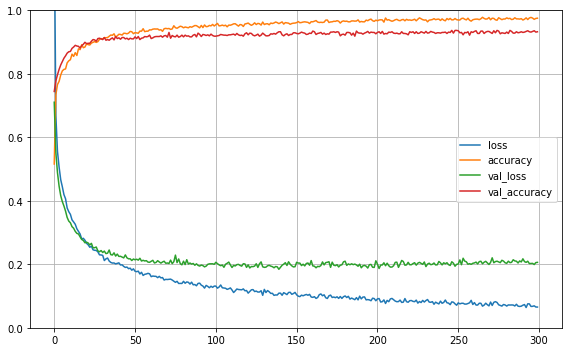

In [ ]:
pd.DataFrame(tune_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_plots("learning_curves_plot")
plt.show()

# **Fine Tuning Neural Network Hyperparameters**

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3, 4, 5],
    "n_neurons": [10, 20, 30, 40, 50, 60, 70 ,80, 85, 90, 95, 100],
    "learning_rate": [1e-2, 1e-3, 2e-4, 2e-3],
    "drop_out": [0.1, 0.2, 0.3, 0.4]
}

rnd_search_cv = RandomizedSearchCV(tune_model, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(train_X, train_Y, 
                  epochs=200,
                  validation_data=(val_X, val_Y), 
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
                  verbose=2
)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=40, n_hidden=0, learning_rate=0.002, drop_out=0.1 .....
Epoch 1/200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


59/59 - 0s - loss: 1.7181 - accuracy: 0.4509 - val_loss: 1.1676 - val_accuracy: 0.6314
Epoch 2/200
59/59 - 0s - loss: 0.9941 - accuracy: 0.6709 - val_loss: 0.8387 - val_accuracy: 0.7179
Epoch 3/200
59/59 - 0s - loss: 0.7892 - accuracy: 0.7372 - val_loss: 0.7252 - val_accuracy: 0.7500
Epoch 4/200
59/59 - 0s - loss: 0.7017 - accuracy: 0.7532 - val_loss: 0.6649 - val_accuracy: 0.7607
Epoch 5/200
59/59 - 0s - loss: 0.6503 - accuracy: 0.7618 - val_loss: 0.6280 - val_accuracy: 0.7703
Epoch 6/200
59/59 - 0s - loss: 0.6157 - accuracy: 0.7634 - val_loss: 0.5975 - val_accuracy: 0.7735
Epoch 7/200
59/59 - 0s - loss: 0.5883 - accuracy: 0.7687 - val_loss: 0.5720 - val_accuracy: 0.7756
Epoch 8/200
59/59 - 0s - loss: 0.5679 - accuracy: 0.7735 - val_loss: 0.5560 - val_accuracy: 0.7810
Epoch 9/200
59/59 - 0s - loss: 0.5521 - accuracy: 0.7783 - val_loss: 0.5407 - val_accuracy: 0.7821
Epoch 10/200
59/59 - 0s - loss: 0.5374 - accuracy: 0.7837 - val_loss: 0.5298 - val_accuracy: 0.7831
Epoch 11/200
59/59 - 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
59/59 - 0s - loss: 0.1831 - accuracy: 0.9327 - val_loss: 0.2592 - val_accuracy: 0.8974
Epoch 180/200
59/59 - 0s - loss: 0.1823 - accuracy: 0.9295 - val_loss: 0.2589 - val_accuracy: 0.9017
Epoch 181/200
59/59 - 0s - loss: 0.1782 - accuracy: 0.9354 - val_loss: 0.2595 - val_accuracy: 0.9017
Epoch 182/200
59/59 - 0s - loss: 0.1782 - accuracy: 0.9375 - val_loss: 0.2580 - val_accuracy: 0.8996
Epoch 183/200
59/59 - 0s - loss: 0.1711 - accuracy: 0.9434 - val_loss: 0.2593 - val_accuracy: 0.8996
Epoch 184/200
59/59 - 0s - loss: 0.1774 - accuracy: 0.9343 - val_loss: 0.2585 - val_accuracy: 0.8974
Epoch 185/200
59/59 - 0s - loss: 0.1788 - accuracy: 0.9322 - val_loss: 0.2585 - val_accuracy: 0.9006
Epoch 186/200
59/59 - 0s - loss: 0.1793 - accuracy: 0.9306 - val_loss: 0.2585 - val_accuracy: 0.8996
Epoch 187/200
59/59 - 0s - loss: 0.1763 - accuracy: 0.9354 - val_loss: 0.2575 - val_accuracy: 0.9006
Epoch 188/200
59/59 - 0s - loss: 0.1744 - accuracy: 0.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.1min finished


88/88 - 1s - loss: 0.9635 - accuracy: 0.6410 - val_loss: 0.5264 - val_accuracy: 0.7767
Epoch 2/200
88/88 - 0s - loss: 0.6163 - accuracy: 0.7415 - val_loss: 0.4358 - val_accuracy: 0.8130
Epoch 3/200
88/88 - 0s - loss: 0.5160 - accuracy: 0.7781 - val_loss: 0.3974 - val_accuracy: 0.8152
Epoch 4/200
88/88 - 0s - loss: 0.4790 - accuracy: 0.7902 - val_loss: 0.3625 - val_accuracy: 0.8440
Epoch 5/200
88/88 - 0s - loss: 0.4452 - accuracy: 0.8020 - val_loss: 0.3506 - val_accuracy: 0.8558
Epoch 6/200
88/88 - 0s - loss: 0.4211 - accuracy: 0.8137 - val_loss: 0.3377 - val_accuracy: 0.8600
Epoch 7/200
88/88 - 0s - loss: 0.4184 - accuracy: 0.8091 - val_loss: 0.3294 - val_accuracy: 0.8665
Epoch 8/200
88/88 - 0s - loss: 0.3940 - accuracy: 0.8287 - val_loss: 0.3227 - val_accuracy: 0.8568
Epoch 9/200
88/88 - 0s - loss: 0.3636 - accuracy: 0.8355 - val_loss: 0.2897 - val_accuracy: 0.8793
Epoch 10/200
88/88 - 0s - loss: 0.3456 - accuracy: 0.8479 - val_loss: 0.2844 - val_accuracy: 0.8868
Epoch 11/200
88/88 - 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7faca8c5a278>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'drop_out': [0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.001, 0.0002,
                                                          0.002],
                                        'n_hidden': [0, 1, 2, 3, 4, 5],
                                        'n_neurons': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 85, 90, 95,
                                                      100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

**Best Parameters From Tuning**

In [ ]:
rnd_search_cv.best_params_

{'drop_out': 0.4, 'learning_rate': 0.002, 'n_hidden': 2, 'n_neurons': 100}

**Note:**<br>
Other Best Parameters:<br>
----------------------------
drop_out: 0.3 <br>
learning_rate: 0.001<br>
n_hidden: 2<br>
n_neurons: 80

In [ ]:
def build_model(n_hidden=2, n_neurons=100, learning_rate=2e-3, drop_out=0.4, input_shape=[41]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
tune_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
tune_history = tune_model.fit(train_X, train_Y, epochs=200,
              validation_data=(val_X, val_Y),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],\
              verbose=2
              )

Epoch 1/200
88/88 - 0s - loss: 0.9383 - accuracy: 0.6442 - val_loss: 0.5155 - val_accuracy: 0.7949
Epoch 2/200
88/88 - 0s - loss: 0.5922 - accuracy: 0.7418 - val_loss: 0.4544 - val_accuracy: 0.8098
Epoch 3/200
88/88 - 0s - loss: 0.5089 - accuracy: 0.7792 - val_loss: 0.3951 - val_accuracy: 0.8237
Epoch 4/200
88/88 - 0s - loss: 0.4645 - accuracy: 0.7917 - val_loss: 0.3667 - val_accuracy: 0.8462
Epoch 5/200
88/88 - 0s - loss: 0.4444 - accuracy: 0.8048 - val_loss: 0.3471 - val_accuracy: 0.8568
Epoch 6/200
88/88 - 0s - loss: 0.4256 - accuracy: 0.8045 - val_loss: 0.3379 - val_accuracy: 0.8568
Epoch 7/200
88/88 - 0s - loss: 0.3980 - accuracy: 0.8209 - val_loss: 0.3371 - val_accuracy: 0.8579
Epoch 8/200
88/88 - 0s - loss: 0.3897 - accuracy: 0.8298 - val_loss: 0.3152 - val_accuracy: 0.8729
Epoch 9/200
88/88 - 0s - loss: 0.3699 - accuracy: 0.8333 - val_loss: 0.2989 - val_accuracy: 0.8814
Epoch 10/200
88/88 - 0s - loss: 0.3596 - accuracy: 0.8408 - val_loss: 0.2865 - val_accuracy: 0.8889
Epoch 11/

Plot is saved at /content/plots/learning_curves_plot.png


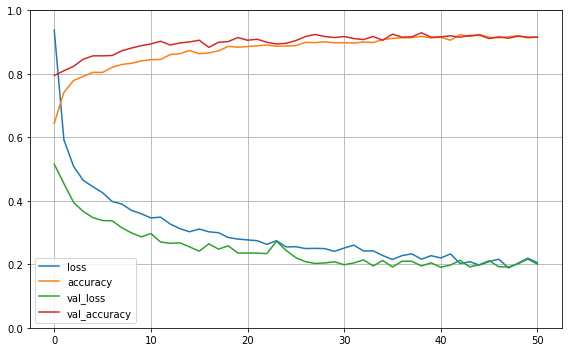

In [ ]:
pd.DataFrame(tune_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_plots("learning_curves_plot")
plt.show()

# **MODEL BUILT WITH TUNED PARAMETERS AND INPUT PIPELINE BUILT WITH TENSORFLOW**

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(7, activation="softmax"),
])

In [ ]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.optimizers.Adam(lr=2e-3), metrics=["accuracy"])

In [ ]:
batch_size = 32
history = model.fit(
          train_set, 
          epochs=200,
          steps_per_epoch = len(X_train)//batch_size,
          validation_data=valid_set,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
          )

Epoch 1/200
87/87 [==============================] - 1s 7ms/step - loss: 0.9761 - accuracy: 0.6422 - val_loss: 0.5035 - val_accuracy: 0.8013
Epoch 2/200
87/87 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.7482 - val_loss: 0.4275 - val_accuracy: 0.8034
Epoch 3/200
87/87 [==============================] - 0s 5ms/step - loss: 0.5212 - accuracy: 0.7698 - val_loss: 0.3825 - val_accuracy: 0.8323
Epoch 4/200
87/87 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.8010 - val_loss: 0.3597 - val_accuracy: 0.8397
Epoch 5/200
87/87 [==============================] - 0s 5ms/step - loss: 0.4123 - accuracy: 0.8236 - val_loss: 0.3415 - val_accuracy: 0.8419
Epoch 6/200
87/87 [==============================] - 0s 5ms/step - loss: 0.4259 - accuracy: 0.8136 - val_loss: 0.3284 - val_accuracy: 0.8643
Epoch 7/200
87/87 [==============================] - 0s 5ms/step - loss: 0.3812 - accuracy: 0.8326 - val_loss: 0.3351 - val_accuracy: 0.8697
Epoch 8/200
8

Plot is saved at /content/plots/learning_curves_plot.png


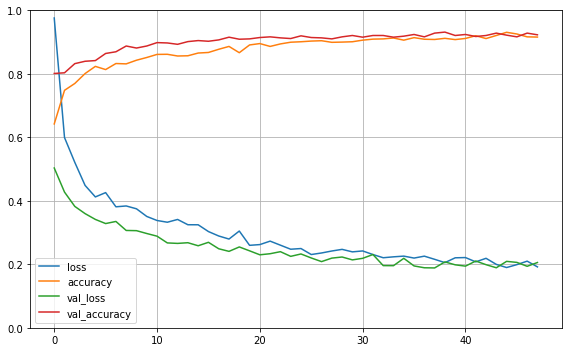

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_plots("learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

39/39 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9038


[0.2733035087585449, 0.9038461446762085]

In [ ]:
new_set = test_set.map(lambda X, y: X) # we could instead just pass test_set, Keras would ignore the labels
X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

array([[6.04693351e-10, 9.45706944e-08, 7.96775339e-08, ...,
        7.49701394e-06, 1.25058164e-09, 1.10989576e-03],
       [2.24677915e-05, 2.34014396e-06, 3.10930792e-09, ...,
        1.09073243e-10, 1.17483562e-12, 9.99970913e-01],
       [1.23196580e-14, 1.60618063e-09, 1.00000000e+00, ...,
        2.42979548e-09, 1.01710096e-15, 1.45108189e-10],
       ...,
       [9.99999881e-01, 9.22731047e-08, 1.68886054e-14, ...,
        5.78922056e-13, 2.73173733e-08, 2.57883013e-08],
       [3.28543456e-03, 4.28523511e-01, 6.70980960e-02, ...,
        3.06434721e-01, 7.10923574e-04, 1.63005680e-01],
       [1.81403976e-07, 9.99991179e-01, 2.33247783e-06, ...,
        1.50298717e-07, 1.00635923e-07, 5.91119124e-06]], dtype=float32)

# **STATISTICAL APPROCH**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
def k_fold(model, jobs = 10, X=train_X, y=train_Y):
  accuracy = cross_val_score(estimator = model, X = X, y = y, cv = jobs, n_jobs = -1)
  print("Mean of 10 accuracies:",accuracy.mean())
  print("Standard Deviation of predicted accuracies:",accuracy.std()) 

In [ ]:
def grid_cv(param_dict, model, n_jobs=3, X=train_X, y=train_Y):
  cv = GridSearchCV(model, cv = 10,
                     param_grid=param_dict, 
                     n_jobs = n_jobs)

  cv.fit(X, y)
  print('Best Parameters using grid search: \n', 
        cv.best_params_)

# **Random Forest Model**

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 20,criterion='entropy')
random_forest.fit(train_X, train_Y)
print("Accuracy from Random Forest model:",random_forest.score(val_X, val_Y))

Accuracy from Random Forest model: 0.9091880341880342


In [ ]:
param_dist = {'n_estimators': [20, 40, 60, 80,100],
              'criterion': ["gini", "entropy"],
              'max_depth': [3, 6, 9, 12],
              'max_features': ["auto", "sqrt", "log2"],
              'bootstrap': [True, False]}

grid_cv(param_dist, random_forest)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 60}


In [ ]:
random_forest = RandomForestClassifier(criterion='entropy', n_estimators = 100, bootstrap=False, max_depth=12, max_features='log2')
random_forest.fit(train_X, train_Y)
print("Accuracy from Random Forest model:",random_forest.score(val_X, val_Y))

Accuracy from Random Forest model: 0.9230769230769231


In [ ]:
k_fold(random_forest)

Mean of 10 accuracies: 0.9045602440264362
Standard Deviation of predicted accuracies: 0.010280045129900377


**Confusion Matrix**

In [ ]:
predictions = random_forest.predict(test_X)

pd.DataFrame(confusion_matrix(test_Y, predictions))

,0,1,2,3,4,5,6
0,200,3,0,0,0,1,1
1,4,60,0,0,2,0,2
2,0,0,66,0,0,0,0
3,1,1,0,441,24,0,8
4,0,1,0,44,227,0,0
5,6,0,0,0,0,66,0
6,0,2,0,15,11,0,63


# **SVC MODEL**

In [ ]:
svc_model = SVC(kernel = "linear", random_state = 10)
svc_model.fit(train_X, train_Y)
print("Accuracy from SVC model:",svc_model.score(val_X, val_Y))

Accuracy from SVC model: 0.8728632478632479


**SVC MODEL PARAMETER TUNING**

In [ ]:
param_dist = {'kernel': ["linear", "poly", "sigmoid"],
              'degree': [3,4,5],
              'gamma': ['scale', 'auto'],
              'coef0': [0.1, 0.3, 0.5, 0.7]}

grid_cv(param_dist, svc_model)

Best Parameters using grid search: 
 {'coef0': 0.7, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
svc_model = SVC(kernel = "poly", coef0=0.7, degree=4, gamma='scale', random_state = 40)
svc_model.fit(train_X, train_Y)
print("Accuracy from SVC model:",svc_model.score(val_X, val_Y))

Accuracy from SVC model: 0.8942307692307693


In [ ]:
k_fold(svc_model)

Mean of 10 accuracies: 0.8774936451448907
Standard Deviation of predicted accuracies: 0.013327086994688991


**Confusion Matrix**

In [ ]:
predictions = svc_model.predict(test_X)

pd.DataFrame(confusion_matrix(test_Y, predictions))

,0,1,2,3,4,5,6
0,198,3,0,0,0,3,1
1,5,59,0,0,1,0,3
2,0,0,66,0,0,0,0
3,1,1,0,437,24,0,12
4,0,0,0,63,209,0,0
5,7,0,0,0,0,65,0
6,0,1,0,17,10,0,63


# **Decision Tree Model**

In [ ]:
decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision.fit(train_X, train_Y)
print("Accuracy from Decision tree model:",decision.score(val_X, val_Y))

Accuracy from Decision tree model: 0.8568376068376068


In [ ]:
param_dist = {
              'criterion': ["gini", "entropy"],
              "splitter": ["best", "random"],
              'max_depth': [12, 15, 18, 30, 40],
              'max_features': ["auto", "sqrt", "log2"]
             }
            
grid_cv(param_dist, decision)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'splitter': 'best'}


In [ ]:
decision = DecisionTreeClassifier(criterion = 'gini', max_depth=12, max_features='auto', splitter='best', random_state = 0)
decision.fit(train_X, train_Y)
print("Accuracy from Decision tree model:",decision.score(val_X, val_Y))

Accuracy from Decision tree model: 0.8012820512820513


In [ ]:
k_fold(decision)

Mean of 10 accuracies: 0.8361832740213522
Standard Deviation of predicted accuracies: 0.02349311632263868


**Confusion Matrix**

In [ ]:
predictions = decision.predict(test_X)

pd.DataFrame(confusion_matrix(test_Y, predictions))

,0,1,2,3,4,5,6
0,190,5,0,1,0,9,0
1,3,52,0,2,6,0,5
2,0,0,65,0,0,0,1
3,1,1,2,391,60,0,20
4,1,2,0,71,196,1,1
5,6,0,0,0,0,66,0
6,2,2,2,21,12,0,52


# **XGBOOST MODEL**

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(train_X, train_Y)
print("Accuracy from XGBoost model:",xgboost.score(val_X, val_Y))

Accuracy from XGBoost model: 0.9049145299145299


In [ ]:
k_fold(xgboost)

Mean of 10 accuracies: 0.9006418403660398
Standard Deviation of predicted accuracies: 0.009197101901675893


**Confusion Matrix**

In [ ]:
predictions = xgboost.predict(test_X)

pd.DataFrame(confusion_matrix(test_Y, predictions))

,0,1,2,3,4,5,6
0,194,3,0,0,1,6,1
1,4,59,0,1,2,0,2
2,0,0,66,0,0,0,0
3,1,1,0,438,26,0,9
4,0,0,0,50,221,0,1
5,5,0,0,0,0,67,0
6,2,0,0,13,11,0,65


# **McNemar Test**

In [ ]:
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

In [ ]:
def probabilities_to_labels(predictions):
  predictions = np.array([np.argmax(row) for row in predictions])
  return predictions

In [ ]:
def calc_mcnemer(model1, model2, test_X=test_X,test_Y=test_Y):
    y_target = test_Y
    m1 = model1.predict(test_X)
    m2 = model2.predict(test_X)
    try:
      if m1.shape[1] == 7:
        m1 = probabilities_to_labels(m1)
      if m2.shape[1] == 7:
        m2 = probabilities_to_labels(m2)
    except:
      pass
    tb = mcnemar_table(y_target=y_target, 
                       y_model1=m1, 
                       y_model2=m2)
    print("Confusion Matrix:\n",tb)

    chi2, p = mcnemar(ary=tb, corrected=True)
    print('chi-squared:', chi2)
    print('p-value:{0:.20f}'.format(p))

In [ ]:
calc_mcnemer(random_forest, svc_model)

Confusion Matrix:
 [[1061   36]
 [  62   90]]
chi-squared: 6.377551020408164
p-value:0.01155727966432526163


In [ ]:
calc_mcnemer(random_forest, decision)

Confusion Matrix:
 [[973  39]
 [150  87]]
chi-squared: 64.02116402116403
p-value:0.00000000000000123090


In [ ]:
calc_mcnemer(random_forest, xgboost)

Confusion Matrix:
 [[1076   34]
 [  47   92]]
chi-squared: 1.7777777777777777
p-value:0.18242243945173197694


In [ ]:
calc_mcnemer(svc_model, decision)

Confusion Matrix:
 [[955  57]
 [142  95]]
chi-squared: 35.45728643216081
p-value:0.00000000260705297022


In [ ]:
calc_mcnemer(svc_model, xgboost)

Confusion Matrix:
 [[1045   65]
 [  52   87]]
chi-squared: 1.2307692307692308
p-value:0.26725749315438468434


In [ ]:
calc_mcnemer(decision, xgboost)

Confusion Matrix:
 [[957 153]
 [ 55  84]]
chi-squared: 45.23557692307692
p-value:0.00000000001747024196


In [ ]:
calc_mcnemer(model, random_forest)

Confusion Matrix:
 [[1083   40]
 [  46   80]]
chi-squared: 0.29069767441860467
p-value:0.58977379065890767063


In [ ]:
calc_mcnemer(model, svc_model)

Confusion Matrix:
 [[1069   28]
 [  60   92]]
chi-squared: 10.920454545454545
p-value:0.00095108270725441574


In [ ]:
calc_mcnemer(model, decision)

Confusion Matrix:
 [[962  50]
 [167  70]]
chi-squared: 62.00921658986175
p-value:0.00000000000000341854


In [ ]:
calc_mcnemer(model, xgboost)

Confusion Matrix:
 [[1069   41]
 [  60   79]]
chi-squared: 3.207920792079208
p-value:0.07328255322488667900


# **FriedMan Test**

In [ ]:
from scipy.stats import friedmanchisquare

from sklearn.model_selection import KFold
from collections import defaultdict

In [ ]:
model_dict = {
    "random_forest": random_forest,
    "svc": svc_model,
    "decision": decision,
    "xgboost": xgboost,
    "ann": model
}

In [ ]:
def friedman_test(model_dict, X=val_X, y=val_Y, n_sets=5):
  n_models = len(model_dict)
  model_accuracies = defaultdict(list)
  kfolds = KFold(n_splits=n_sets)
  for x_split_indices, y_split_indices in kfolds.split(X):
    x_split, y_split = X[x_split_indices], y[x_split_indices]
    for model in model_dict:
      if model == 'ann':
        model_accuracies[model].append(model_dict[model].evaluate(x_split, y_split, verbose=0)[1])
      else:
        model_accuracies[model].append(model_dict[model].score(x_split, y_split))

  print(pd.DataFrame(model_accuracies))
  accuracies = pd.DataFrame(model_accuracies)
  accuracies = accuracies.iloc[:, :].values
  accuracies = np.transpose(accuracies)
  print()
  print(friedmanchisquare(accuracies[0], accuracies[1], accuracies[2]))
  print("---------------------------------------")

In [ ]:
from itertools import combinations

for i in combinations(model_dict.keys(), 3):
  friedman_dict = defaultdict(int)
  for each_model in i:
    friedman_dict[each_model] = model_dict[each_model]
  friedman_test(friedman_dict, X=val_X, y=val_Y, n_sets=5)

   random_forest       svc  decision
0       0.918449  0.899733  0.794118
1       0.921228  0.889186  0.797063
2       0.929239  0.895861  0.801068
3       0.922563  0.895861  0.810414
4       0.923899  0.890521  0.803738

FriedmanchisquareResult(statistic=10.0, pvalue=0.006737946999085468)
---------------------------------------
   random_forest       svc   xgboost
0       0.918449  0.899733  0.898396
1       0.921228  0.889186  0.905207
2       0.929239  0.895861  0.903872
3       0.922563  0.895861  0.905207
4       0.923899  0.890521  0.911883

FriedmanchisquareResult(statistic=8.400000000000006, pvalue=0.01499557682047766)
---------------------------------------
   random_forest       svc       ann
0       0.918449  0.899733  0.925134
1       0.921228  0.889186  0.923899
2       0.929239  0.895861  0.922563
3       0.922563  0.895861  0.922563
4       0.923899  0.890521  0.921228

FriedmanchisquareResult(statistic=7.6000000000000085, pvalue=0.0223707718561655)
--------------------

In [ ]:
model.evaluate(val_X, val_Y, verbose=0)

[0.20568698644638062, 0.9230769276618958]

# **3D PLOTS**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
def plot_3D(parameter, accuracies, n_splits=5):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  n = 100

  xs = [[i]*5 for i in parameter]
  ys = [[i for i in range(1, n_splits+1)]*5]
  zs = accuracies

  ax.grid(False)

  ax.scatter(xs, ys, zs, s = 150)

  ax.set_xlabel('n_trees')
  ax.set_ylabel('No.of Folds')
  ax.set_zlabel('Accuracies')
  plt.show()

In [ ]:
plot_accuracies = []
n_trees = [40, 50, 60, 70, 80]
kfolds = KFold(n_splits=5)
for n_tree in n_trees:
    accuracies = []
    for x_split_indices, y_split_indices in kfolds.split(test_X):
      x_split, y_split = test_X[x_split_indices], test_Y[x_split_indices]
      plot_random = RandomForestClassifier(criterion='entropy', n_estimators = n_tree, bootstrap=False, max_depth=12, max_features='log2')
      plot_random.fit(train_X, train_Y)
      accuracies.append(plot_random.score(x_split, y_split))
    plot_accuracies.append(accuracies)

In [ ]:
plot_3D(n_trees, plot_accuracies, n_splits=5)
save_plots("RANDOM_FOREST_3D_PLOT")